# Compute truck's shortest travel time through road network

Import numpy module:

In [1]:
import numpy as np

Import custom Python modules for road networks:

In [2]:
from geotools.network import Node, Road, RoadNetwork

Build roads and nodes from shapefile:

In [3]:
road = Road("/home/benjamin/Documents/Post-doc Guyane/Data/Geo layers/Road network/main_road_network.shp")
road.set_direction('SENS', {'Double sens': 'two-ways', 'Sens inverse': 'reverse', 'Sens unique': 'one-way'})
node = Node("/home/benjamin/Documents/Post-doc Guyane/Data/Geo layers/RESEAU_ROUTIER/NOEUD_ROUTIER.SHP")
node = node.to_crs(crs=road.crs)

Build road network:

In [4]:
road_network = RoadNetwork(road, node)

Set max allowed speed at intersections:

In [5]:
v_in, v_out = road_network.velocity_at_intersection(
    "NATURE", {'Carrefour simple': 20, 'Carrefour aménagé': 30, 'Barrière': 0, 'Embarcadère': 0,
               'Echangeur complet': 40, 'Petit rond-point': 20, "Changement d'attribut": 20})

Compute travel time:

In [6]:
travel_time = road_network.travel_time('ETAT', {'Non revêtu': 70, 'Revêtu': 90, 'Sentier': 50,
                                                   "Chemin d'exploitation": 40}, 'ETAT',
                                          {'Non revêtu': 0.015, 'Revêtu': 0.01, 'Sentier': 0.02,
                                           "Chemin d'exploitation": 0.02}, acceleration_rate=1.5, gross_hp=500,
                                          vehicle_weight=30000, v_in_max=v_in, v_out_max=v_out, speed_format='km/h')

Compute fuel consumption:

In [34]:
 fuel_demand = road_network.fuel_consumption(
     'ETAT', {'Non revêtu': 70, 'Revêtu': 90, 'Sentier': 50,
              "Chemin d'exploitation": 40}, 
     'ETAT', {'Non revêtu': 0.015, 'Revêtu': 0.01, 'Sentier': 0.02, "Chemin d'exploitation": 0.02},
     gross_hp=100, vehicle_weight=1100, v_in_max=v_in, v_out_max=v_out, vehicle_frontal_area=2.52,
     speed_format="km/h")

#### Sum travel time and fuel consumption over each road segment:

In [15]:
sum_travel_time = {'one-way': [np.sum(t) for t in travel_time["one-way"]], 
                   'reverse': [np.sum(t) for t in travel_time["reverse"]]}

In [35]:
sum_fuel_demand = {'one-way': [np.sum(f) for f in fuel_demand["one-way"]], 
                   'reverse': [np.sum(f) for f in fuel_demand["reverse"]]}

#### Build road's corresponding graph with respect to travel time:

In [16]:
road_network.build_graph(sum_travel_time["one-way"], sum_travel_time["reverse"])

Compute shortest path between some example nodes:

In [28]:
path = road_network.get_shortest_path(road_network.nodes.geometry[45], road_network.nodes.geometry[1245])
path_time = road_network.get_shortest_path_length(road_network.nodes.geometry[45], road_network.nodes.geometry[1245])

Path travel time and length (in km):

In [29]:
print("Travel time = %.1f h" % path_time)
print("Length = %.1f km" % (np.sum(path.length)/1000))

Travel time = 5.0 h
Length = 208.1 km


Try reverse path:

In [31]:
path = road_network.get_shortest_path(road_network.nodes.geometry[1245], road_network.nodes.geometry[45])
path_time = road_network.get_shortest_path_length(road_network.nodes.geometry[1245], road_network.nodes.geometry[45])

In [32]:
print("Travel time = %.1f h" % path_time)
print("Length = %.1f km" % (np.sum(path.length)/1000))

Travel time = 4.9 h
Length = 208.1 km


Plot path:

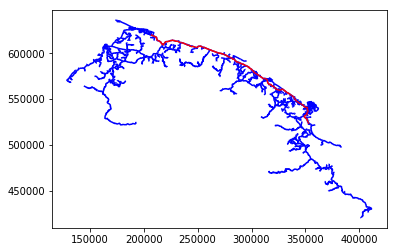

In [33]:
road.plot(layer_color="blue")
path.plot(layer_color="red")

#### Build network graph with respect to fuel demand:

In [36]:
road_network.build_graph(sum_fuel_demand["one-way"], sum_fuel_demand["reverse"])

Compute shortest path between some example nodes:

In [56]:
path = road_network.get_shortest_path(road_network.nodes.geometry[450], road_network.nodes.geometry[12])
path_fuel = road_network.get_shortest_path_length(road_network.nodes.geometry[450], road_network.nodes.geometry[12])

In [57]:
print("Fuel demand = %.3f l" % path_fuel)
print("Length = %.1f km" % (np.sum(path.length)/1000))

Fuel demand = 11.042 l
Length = 159.9 km


Try reverse path:

In [53]:
path = road_network.get_shortest_path(road_network.nodes.geometry[12], road_network.nodes.geometry[450])
path_fuel = road_network.get_shortest_path_length(road_network.nodes.geometry[12], road_network.nodes.geometry[450])

In [54]:
print("Fuel demand = %.3f l" % path_fuel)
print("Length = %.1f km" % (np.sum(path.length)/1000))

Fuel demand = 11.065 l
Length = 159.8 km


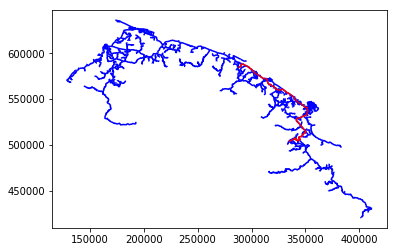

In [55]:
road.plot(layer_color="blue")
path.plot(layer_color="red")